### Relative Value Trading Strategy

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
# User inputs for ticker and data range
ticker_1 = input("Enter first ticker: ")
ticker_2 = input("Enter second ticker: ")
data_start_date = input("Enter data start date in yyyy-mm-dd format: ")
data_end_date = input("Enter data end date in yyyy-mm-dd format: ")
regression_start_date = input("Enter regression start date in yyyy-mm-dd format: ")
regression_end_date = input("Enter regression end date in yyyy-mm-dd format: ")

Enter first ticker: ICICIBANK.NS
Enter second ticker: HDFCBANK.NS
Enter data start date in yyyy-mm-dd format: 2021-01-01
Enter data end date in yyyy-mm-dd format: 2025-07-09
Enter regression start date in yyyy-mm-dd format: 2021-01-01
Enter regression end date in yyyy-mm-dd format: 2025-01-01


In [3]:
# Download data
data_1 = yf.download(ticker_1, start = data_start_date, end = data_end_date)['Close']
data_2 = yf.download(ticker_2, start = data_start_date, end = data_end_date)['Close']

/tmp/ipython-input-3380441651.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_1 = yf.download(ticker_1, start = data_start_date, end = data_end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3380441651.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_2 = yf.download(ticker_2, start = data_start_date, end = data_end_date)['Close']
[*********************100%***********************]  1 of 1 completed


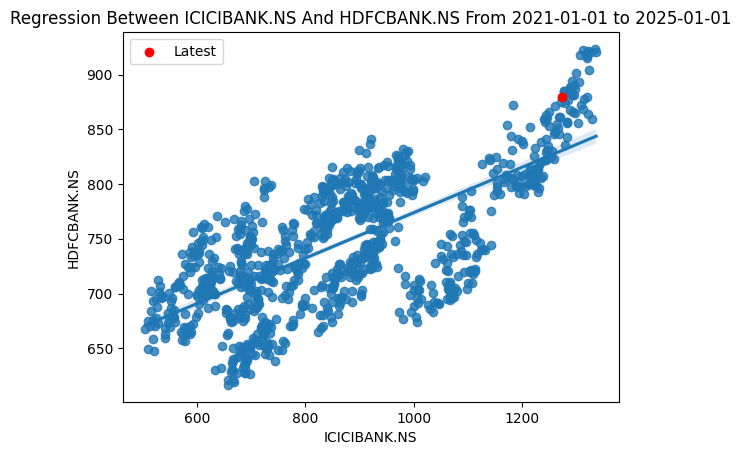

In [4]:
# Correlation between close prices
x = data_1[regression_start_date: regression_end_date].values.reshape(-1,1)
y = data_2[regression_start_date: regression_end_date].values.reshape(-1,1)
sns.regplot(x = x, y = y)
plt.xlabel(ticker_1)
plt.ylabel(ticker_2)
plt.title(f"Regression Between {ticker_1} And {ticker_2} From {regression_start_date} to {regression_end_date}")
plt.scatter(x[-1], y[-1], color = 'red', label = 'Latest')
plt.legend()
plt.show()

In [5]:
# Fitting regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
residuals = y - model.predict(x)
zscore = (residuals[-1][0] - residuals.mean())/ residuals.std()
r_squared = model.score(x, y)
latest_residual = residuals[-1][0]
print("Latest Residual: ", latest_residual)
print("R Squared: ", r_squared)
print("Zscore: ", zscore)

Latest Residual:  48.668882721566774
R Squared:  0.5029266808059019
Zscore:  1.1494522798010882


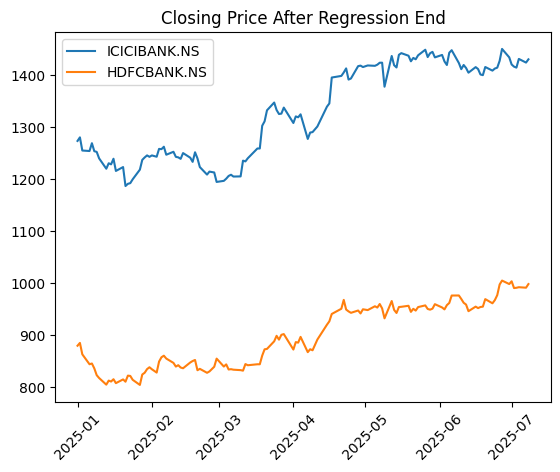

In [6]:
# Evaluating performance
plt.plot(data_1[regression_end_date: ], label = ticker_1)
plt.plot(data_2[regression_end_date: ], label = ticker_2)
plt.title("Closing Price After Regression End")
plt.xticks(rotation = 45)
plt.legend()
plt.show()